In [1]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from basic_units import radians
import cmath
import math

In [23]:
#Function to solve Schrodinger equation with the three-qubit Hamiltonian given in Eq(1) in the manuscript
#The description of the function solve_ivp is given in the official python documentation on the scipy library 
def solution(r,w,t0,g0,ry,rx,y0,T):
    s = []
    for j in range(len(y0)):
        sol = solve_ivp(encirc, [0, T], y0[:,j], args=(r,w,t0,g0,ry,rx), dense_output=True,method='DOP853')#DOP853
        s.append(transform(sol,T))
    return s


# Function (exact form of the Schrodinger equation) which is feeded into the solution function above.
#This function defines the exact shape of the three-qubit Hamiltonian with the time-varying system parameters.

def encirc(t,y,r,w,t0,g0,ry,rx):
    x1,x2,x3,x4,x5,x6,x7,x8 = y # elements of the 8D state vector |psi>
    Delta = ry*(1 + np.cos(w*t+t0)) # plays the role of the function y(t) in the manuscript
    epsilon = rx*np.sin(w*t+t0) # plays the role of the function x(t) in the manuscript
    phi = cmath.atan(0.1e1 / (epsilon + complex(0, 1) * Delta)) #complex-valued angle, as described in the manuscript
    J = 1 # scaling factor for all qubit couplings
    alpha = Delta * cmath.sin(np.real(phi)) / cmath.sin(np.imag(phi)) #same as in the manuscript
    f1 = 1 #parameter f1, as desribed in the manuscript
    f2 = 1 # parameter f2
    f3 = 2 # parameter f3
    a = g0 # coupling strength between qubit 1 and qubit 2
    b = g0*np.sin(w*t/2+t0/2)**2+0.0 # coupling strength between qubit 1 and qubit 3
    c = g0 # coupling strength between qubit 2 and qubit 3
    d = 0.00 #perturbation in the qubit 1
    return ([complex(0, -1) * (a * J + b * J + c * J + d) * x1 + 
             complex(0, -1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x2 + 
             complex(0, -1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x3 + 
             complex(0, -1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x5,
             complex(0, 1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x1 + 
             complex(0, -1) * (a * J - b * J - c * J + d) * x2 + 
             complex(0, -1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x4 + 
             complex(0, -1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x6,
             complex(0, 1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x1 + 
             complex(0, -1) * (-a * J + b * J - c * J + d) * x3 + 
             complex(0, -1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x4 + 
             complex(0, -1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x7,
             complex(0, 1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x2 + 
             complex(0, 1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x3 + 
             complex(0, -1) * (-a * J - b * J + c * J + d) * x4 + 
             complex(0, -1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x8,
             complex(0, 1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x1 + 
             complex(0, -1) * (-a * J - b * J + c * J - d) * x5 + 
             complex(0, -1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x6 + 
             complex(0, -1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x7,
             complex(0, 1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x2 + 
             complex(0, 1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x5 + 
             complex(0, -1) * (-a * J + b * J - c * J - d) * x6 + 
             complex(0, -1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x8,
             complex(0, 1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x3 + 
             complex(0, 1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x5 + 
             complex(0, -1) * (a * J - b * J - c * J - d) * x7 + 
             complex(0, -1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)) * x8,
             complex(0, 1) * f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x4 + 
             complex(0, 1) * f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x6 + 
             complex(0, 1) * f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)) * x7 + 
             complex(0, -1) * (a * J + b * J + c * J - d) * x8])




# Function generating the initial eigenvalues and eigenstates of the Hamiltonian at time t=0
def init_state(r,t0,g0,ry,rx,typ):
    Delta = ry*(1 + r*np.cos(t0))
    epsilon = rx*np.sin(t0)
    phi = cmath.atan(0.1e1 / (epsilon + complex(0, 1) * Delta))
    alpha = Delta * cmath.sin(np.real(phi)) / cmath.sin(np.imag(phi))
    J = 1
    f1 = 1
    f2 = 1
    f3 = 2
    a = g0
    b = g0
    c = g0
    d = 0.00 #perturbation of the first qubit
    H = [[a * J + b * J + c * J+d,f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),
            f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0,
            f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0,0,0],
           [-f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),a * J - b * J - c * J+d,
            0,f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0,
            f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0,0],
           [-f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),0,-a * J + b * J - c * J+d,
            f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0,0,
            f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0],
           [0,-f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),
            -f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),
            -a * J - b * J + c * J+d,0,0,0,f1 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi))],
           [-f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),0,0,0,-a * J - b * J + c * J-d,
            f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),
            f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi)),0],
           [0,-f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),0,0,
            -f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),
            -a * J + b * J - c * J-d,0,f2 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi))],
           [0,0,-f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),0,
            -f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),0,a * J - b * J - c * J-d,
            f3 * alpha * (complex(0, 1) * cmath.cos(phi) + cmath.sin(phi))],
           [0,0,0,-f1 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),0,
            -f2 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),
            -f3 * alpha * (complex(0, 1) * cmath.cos(phi) - cmath.sin(phi)),a * J + b * J + c * J-d]]
    
    e8,v8 = LA.eig(H)
    es = np.sort((e8))
    vs = np.zeros((8,8),dtype=complex)
    for j in range(len(es)):
        for k in range(len(es)):
            if es[j]==e8[k]:
                vs[:,j]=v8[:,k]
    return es, vs


#Function to calculate fidelity between two vectors s(t) (s(t) is matrix) and y0. 
#y0 is an initial state, s(t)- time-evolving state obtained by solving the Schrodinger equation in the function
#"solution"
def states_overlap(s,y0):
    over = []
    for row in range(len(s)):
        over.append(np.abs(np.dot(np.conj(y0),s[row]))**2)
    return over

#Function to generate matrix, whose columns correspond to fidelity for all 8 eigenvectors |psi>
def overlap_all(solution,y0):
    overlap = []
    for h in range(len(y0)):
        ov = []
        for j in range(len(y0)):
            ov.append(states_overlap(solution[h],y0[:,j]))
        overlap.append(ov)
    return overlap

# Function to transform a solution of ODE system into a dense time-dependent matrix, where rows correspond to time, and
# columns to each element of a state vector
def transform(sol,time):
    t = np.linspace(0, time,5000)
    fun = sol.sol(t)
    solu = fun[0]
    for j in range(1,len(fun)):
        solu = np.c_[solu,fun[j]]
    norm = LA.norm(solu,axis=1)
    s = np.zeros((len(solu),len(solu[0])),dtype=complex)
    for j in range(0,len(solu)):
        for k in range(0,len(solu[0])):
            s[j,k] = (solu[j,k]/norm[j])
    return s


In [24]:
#Initial system parameters:

T =2500 #period time T
t0 = np.pi+0.000001#0.000001 #initial phase phi0
w = (2*np.pi)/T #angular frequency
g = 1.0 #qubit coupling strength
rx = 1 #semi-axis along x of the encircling ellipse 
ry = 3 #semi-axis along y of the encircling ellipse 

In [25]:
# Initial state vector
e0, y0 = init_state(r,t0,g,ry,rx,'r')

#Calculation of fidelity for all 8 initial eigenvectors of the Hamiltonian in Eq.(1) of the manuscript
ov = []
for j in [0,1]:
    s = solution(r,(-1)**j*w,t0,g,ry,rx,y0,T)
    ov.append(overlap_all(s,y0))

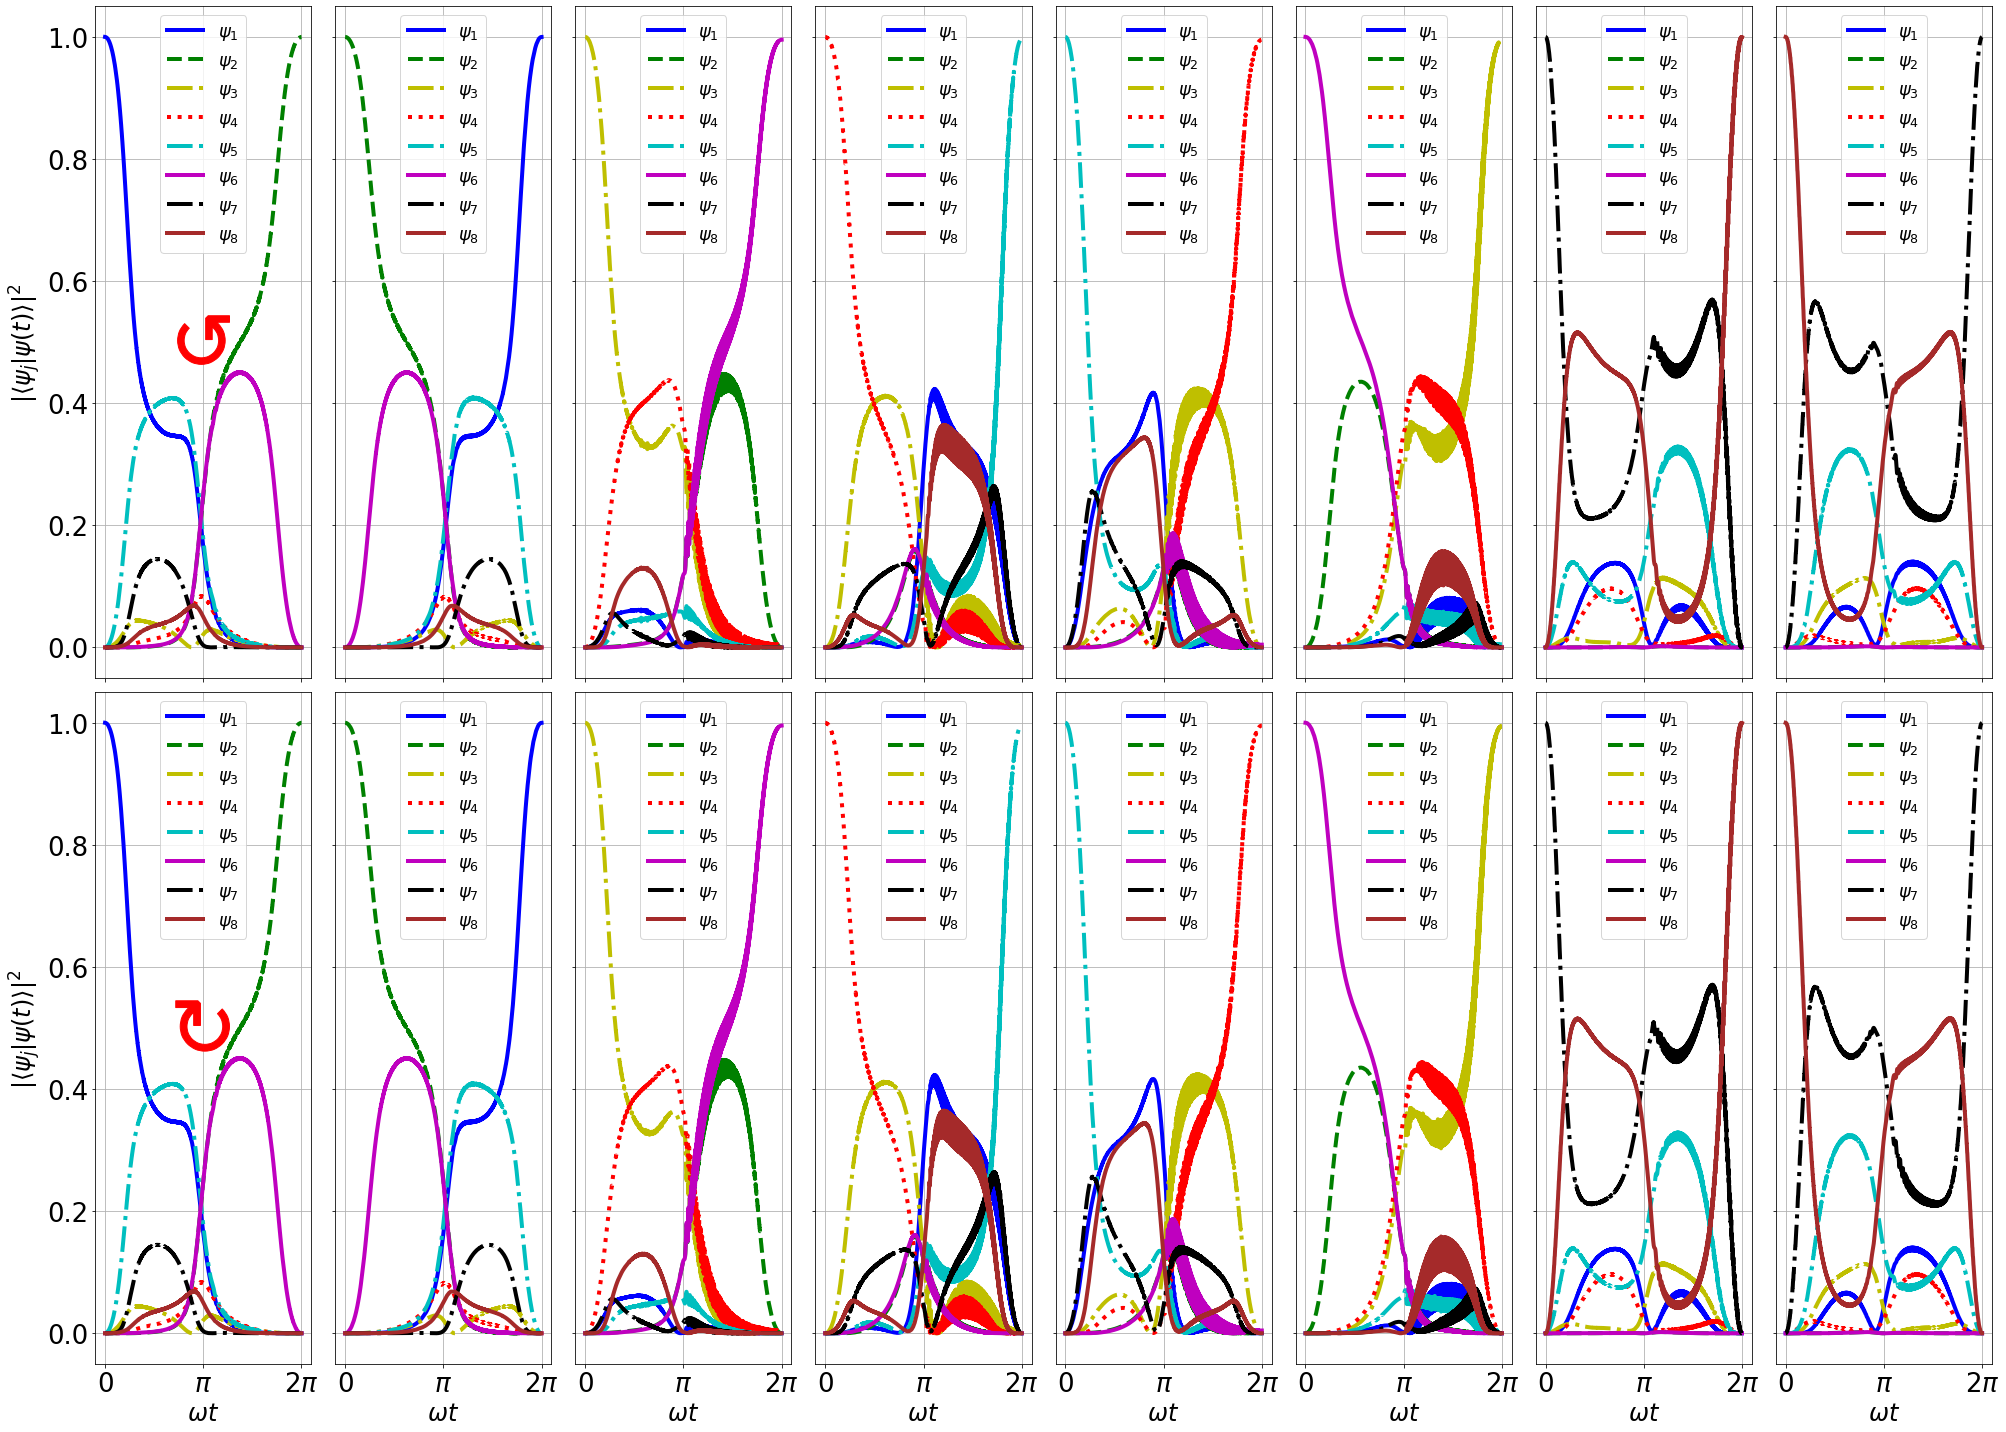

In [19]:
#Figures 4 and 5 in the manuscript
lab = []
for j in range(len(y0)):
    lab.append(r'$\psi_{}$'.format(j+1))#(np.round(e0[j],2)))
curve =['b-','g--','y-.','r:','c-.','m-','k-.','brown']#['b-','g--','y-.','r:','c-','m--','k-.','brown']
t = np.linspace(0, T, 5000)
theta = 2*np.pi*t/T
x = [val*radians for val in theta]

fig, axs = plt.subplots(2,8,sharey=True,sharex=True,figsize=(28,20))
plt.rc('xtick', labelsize=26)
plt.rc('ytick', labelsize=26)
j = 0
for ax in axs.flat:
    if j<8:
        for k in range(len(ov)*4):
            ax.plot(x,ov[0][j][k][:],curve[k],label=lab[k],linewidth=4)
    else:
        for k in range(len(ov)*4):
            ax.plot(x,ov[1][j-8][k][:],curve[k],label=lab[k],linewidth=4)
        ax.set_xlabel(r'$\omega t$',fontsize=24)
        ax.set_xticks(np.arange(0,2*np.pi+0.1,np.pi))
    ax.grid()

    ax.legend(loc='best',fontsize=18)
    if j==0:
        ax.set_ylabel(r'$|\langle\psi_j|\psi(t)\rangle|^2$',fontsize=24)
        ax.plot([3],[0.5],'r',marker=r'$\circlearrowleft$',ms=60)
    if j==8:
        ax.set_ylabel(r'$|\langle\psi_j|\psi(t)\rangle|^2$',fontsize=24)
        ax.plot([3],[0.5],'r',marker=r'$\circlearrowright$',ms=60)    
    j+=1
plt.tight_layout()
plt.show()